# Introduction

In [1]:
"""
What? 5 ways to solve a linear regression problem

An example of linear regression via normal equation, QR decomposition, SVD with pseudo inverse,
lstsq and sklearn linear regression
"""

'\nWhat? An example if linear regression via normal equation, QR decomposition, SVD with pseudo inverse\nand using the bulti-in function lstsq\n\n\nRevision No: 2\nLast revised: 06/02/21\nReferences:\nGLM\n'

# Import python modules

In [2]:
from numpy import array, dot
from numpy.linalg import inv, qr, pinv, lstsq
from matplotlib import pyplot

[[0.05 0.12]
 [0.18 0.22]
 [0.31 0.35]
 [0.42 0.38]
 [0.5  0.49]]


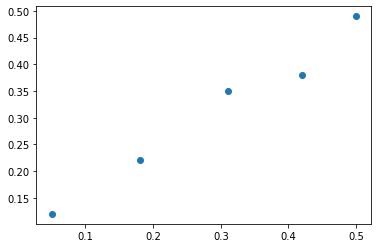

In [3]:
# define dataset
data = array([
  [0.05, 0.12],
  [0.18, 0.22],
  [0.31, 0.35],
  [0.42, 0.38],
  [0.5, 0.49]])
print(data)
# split into inputs and outputs
X, y = data[:,0], data[:,1]
X = X.reshape((len(X), 1))
# scatter plot
pyplot.scatter(X, y)
pyplot.show()

# [1] linear least squares SOLVED DIRECTLY == normal equation

Coefficient found via dirct inversion of the least squares:  [1.00233226]


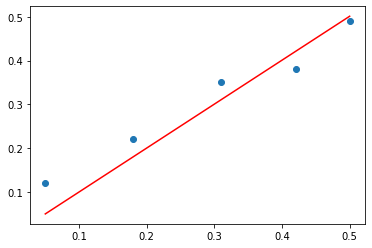

In [4]:
b = inv(X.T.dot(X)).dot(X.T).dot(y)
print("Coefficient found via dirct inversion of the least squares: ", b)
# predict using coefficients
yhat = dot(X,b) # equivalenty -> X.dot(b)
# plot data and predictions
pyplot.scatter(X, y) 
pyplot.plot(X, yhat, color='red') 
pyplot.show()

# [2] solving it using QR decomposition

In [5]:
"""
The QR decomposition approach is more computationally efficient and 
more numerically stable than calculating the normal equation directly, 
but does not work for all data matrices.
"""

'\nThe QR decomposition approach is more computationally efficient and \nmore numerically stable than calculating the normal equation directly, \nbut does not work for all data matrices.\n'

Coefficient found via QR decomposition:  [1.00233226]


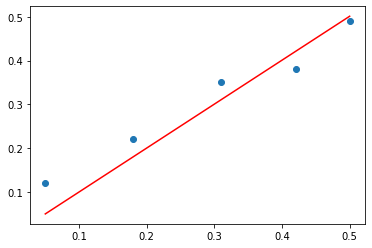

In [6]:
X = X.reshape((len(X), 1))
# factorize
Q, R = qr(X)
b = inv(R).dot(Q.T).dot(y) 
print("Coefficient found via QR decomposition: ", b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions 
pyplot.scatter(X, y) 
pyplot.plot(X, yhat, color='red')
pyplot.show()

# [3] Solving via SVD and pseudo-inverse

In [7]:
"""
Unlike the QR decomposition, all matrices have a singular-value decomposition. 
It is the de-facto standard for solving the system of linear equations for linear regressio., 
SVD is more stable and the preferred approach.
"""

'\nUnlike the QR decomposition, all matrices have a singular-value decomposition. \nIt is the de-facto standard for solving the system of linear equations for linear regressio., \nSVD is more stable and the preferred approach.\n'

Coefficient found via SVD decomposition and pseudo inverse:  [1.00233226]


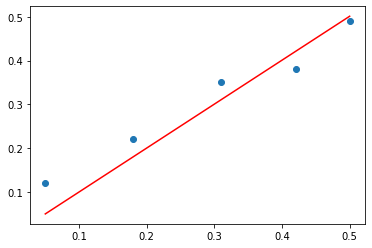

In [8]:
X = X.reshape((len(X), 1))
# calculate coefficients
b = pinv(X).dot(y)
print("Coefficient found via SVD decomposition and pseudo inverse: ", b)
# predict using coefficients
yhat = X.dot(b)
# plot data and predictions 
pyplot.scatter(X, y) 
pyplot.plot(X, yhat, color='red') 
pyplot.show()

# [4] Using numpy lstsq

Coefficient found via numpy lstsq [1.00233226]


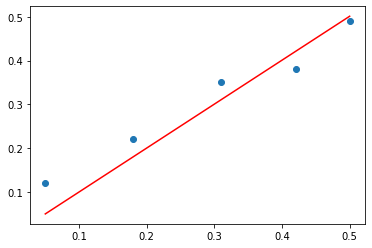

In [9]:
X = X.reshape((len(X), 1))
# calculate coefficients
b, residuals, rank, s = lstsq(X, y, rcond = -1) 
print("Coefficient found via numpy lstsq", b)
# predict using coefficients
yhat = X.dot(b)
# plot data and prediction
pyplot.scatter(X, y)
pyplot.plot(X, yhat, color='red') 
pyplot.show()

# [5] Using skleanr linear regression

In [10]:
from sklearn.linear_model import LinearRegression
sklinreg = LinearRegression()
sklinreg.fit(X, y)
a = sklinreg.coef_
b = sklinreg.intercept_
print(a,b)

[0.78715288] 0.08215135794934386


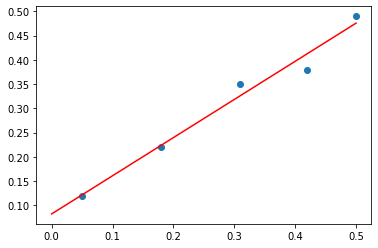

In [12]:
# plot data and prediction
import numpy as np
xx = np.linspace(0,0.5,10)
yy = a*xx+b 
pyplot.scatter(X, y)
pyplot.plot(xx, yy, color='red') 
pyplot.show()